# 1. Introducción

En el presente trabajo se analiza el índice de libertad humana ([Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new)) de el instituto Cato. Este índice utiliza 79 indicadores de libertad personal y económica en distintos aspectos dimensionan en las siguientes áreas:

- Rule of Law
- Security and Safety
- Movement
- Religion
- Association, Assembly, and Civil Society
- Expression and Information
- Identity and Relationships
- Size of Government
- Legal System and Property Rights
- Access to Sound Money
- Freedom to Trade Internationally
- Regulation of Credit, Labor, and Business

A continuación se presenta un análisis de las variables relacionadas a *Identity and Relationships* (pf_identity) en paises de Latinoamérica, y los compararemos con las estadísticas globales, contrastándolo con el índice de libertad económica (ef_score) y eventualmente con el de libertad humana (hf_score). 

#### Carga de datset y librerías de R empleadas en el procesamiento

In [21]:
# Paquetes
library(tidyverse)
library(plotly)  # grafícos dinámicos (no responden en Github)
#install.packages("moments")
#install.packages("psych")
library(moments)  # permite calcular coeficientes de asimetría y kurtosis
library(psych)  # permite hacer matriz de dispersión con coeficientes de correlación

# Carga dataset
df0 <- read.csv("hfi_cc_2018.csv")

df <- df0 %>% select('year', 'ISO_code', 'countries', 'region',      # Selección de variables de interés para el trabajo
                     starts_with('pf_identity'),
                     'ef_score', # Economic Freedom (score)
                     'ef_rank', # Economic Freedom (rank)
                     'hf_score', # Human Freedom (score)
                     'hf_rank') # Human Freedom (rank))

In [34]:
df %>% filter(year == 2016) %>% select(names(df[5:17])) %>%
  gather(key = variable, value = value) %>% 
  group_by(variable) %>% 
  summarise_all(list(min = min, max = max, media = mean, mediana =median, ds = sd), na.rm = TRUE) %>% 
  mutate(cv = ds/media *100)

variable,min,max,media,mediana,ds,cv
ef_rank,1.000000,162.00000,81.271605,81.500000,46.9642423,57.78678
ef_score,2.880000,8.97000,6.795062,6.905000,0.8860263,13.03927
hf_rank,1.000000,162.00000,81.179012,81.500000,46.9410764,57.82415
hf_score,3.765827,8.88741,6.889871,6.823996,1.0796007,15.66939
pf_identity,0.000000,10.00000,6.976337,8.000000,3.0892516,44.28185
pf_identity_divorce,0.000000,10.00000,7.449664,10.000000,3.7043368,49.72488
pf_identity_legal,0.000000,10.00000,6.310680,7.000000,3.6354171,57.60738
pf_identity_parental,0.000000,10.00000,7.279874,10.000000,3.8193342,52.46429
pf_identity_parental_divorce,0.000000,10.00000,7.358491,10.000000,3.8897513,52.86072
pf_identity_parental_marriage,0.000000,10.00000,7.183544,10.000000,4.0076974,55.78997


# 2. Índice de identidad y de libertad humana en el mundo y Latinoamérca y el Caribe en el año 2016

Cuando se analizan las medidas de posición central de los índices de indentidad (*pf_identity*) y de libertad humana (*hf_score*): medias y medianas, no se observan diferencias entre los indicadores de Latinoamérica y el Caribe (LAC) en relación al las medidas globales. Si bien a media de *pf_identity* es superior en LAC (8.01) en comparación a la media global (6.98), la mediana global de esta variable es apenas 0.5 superior que en LAC. De este modo, en principio no se puede ser concluyente sobre afirmar la existencia de diferencias significativa entre entre los índices de la región en relación al global.

En relación a lo señalado en el párrafo previo, debe destacarse que otras variables que no se están considerando aquí pueden estar influenciando sobre estos indicadores, las que podríamos denominar variables de confusión y que ocultan diferencias relativas de esos indicadores entre las regiones; por ejemplo variables referidas a los regímenes políticos o de gobierno.    

Más allá de los comentario en relación a las medidas de posición central, si se observa una mayor dispersión relativa (medida a través de coeficiente de variación: cv) en los indicadores globales en comparación a LAC; particularmente, el coeficiente de variación de indicador *pf_identity* en LAC es 22 %, inferior al 44 % a nivel global. De este modo, la distribución de la la variable *pf_identity* es más homogénea en LAC, y por ende la media es una medida de posición más representativa para la región en contraste a lo que sucede a nivel global, donde se observa una mayor heterogenidad.

In [8]:
ano <- 2016  # Año de interés
vars <-  c("hf_score", "pf_identity")  # variables a caracterizar
med.descrip <- list(min = min, max = max, media = mean, mediana =median, ds = sd)  # Medidas descriptivas

descrip.world <- df %>% filter(year %in% ano) %>% 
  select(names(df[, vars])) %>%
  gather(key = variable, value = value) %>% 
  group_by(variable) %>% 
  summarise_all(med.descrip, na.rm = TRUE) %>% 
  mutate(cv = ds/media *100)

descrip.latam <- df %>% filter(year %in% ano & region == "Latin America & the Caribbean") %>% 
  select(names(df[, vars])) %>%
  gather(key = variable, value = value) %>% 
  group_by(variable) %>% 
  summarise_all(med.descrip, na.rm = TRUE) %>% 
  mutate(cv = ds/media *100)


In [9]:
print("Global")
descrip.world

print("Latinoamércia y El Caribe")
descrip.latam

[1] "Global"


variable,min,max,media,mediana,ds,cv
hf_score,3.765827,8.88741,6.889871,6.823996,1.079601,15.66939
pf_identity,0.000000,10.00000,6.976337,8.000000,3.089252,44.28185


[1] "Latinoamércia y El Caribe"


variable,min,max,media,mediana,ds,cv
hf_score,4.200724,8.008018,6.954305,6.998125,0.7051865,10.14029
pf_identity,5.000000,10.000000,8.016026,7.500000,1.7848933,22.26656


Los comentarios vertidos anteriormente pueden ratificarse observando de los gráficos de caja y brazos (boxpot). Adicionalmente, estos gráficos permiten apreciar una mayor asimetría izquierda en el caso de la variable *pf_identity* a nivel global.

Por otra parte, en el caso de la variable *hf_score*, tanto global como en LAC, se observan datos atípicos u outliers (i.e. con valores atípicos bajos Siria -a nivel global- y Venezuela en LAC), los que eventualmente deberían analizarse con precaución, ya que podrían afectar estimaciones en caso de que busque avanzar en análisis inferenciales. Esto último no se constituye como un objetivo en esta instancia, por lo que no serán eliminados en cuanto nos interesa hacer una caracterización general de la distribución de los indicadores.

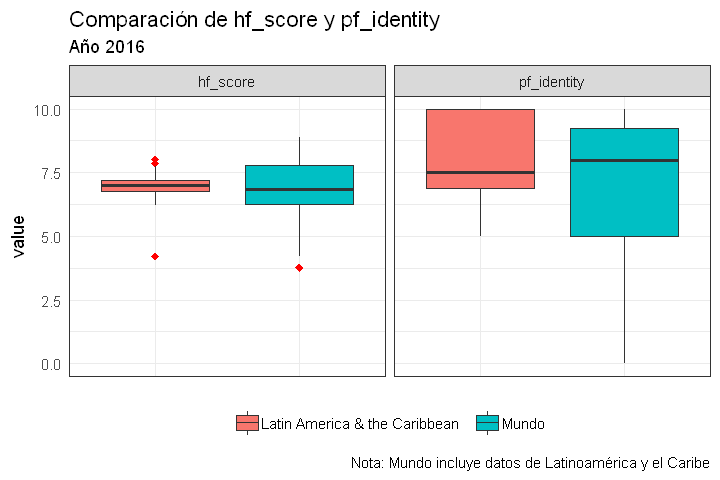

In [64]:
options(repr.plot.width=6, repr.plot.height=4)

df.all <- df %>% filter(year %in% ano) %>% 
  select(names(df[, c("ISO_code", "region", vars)])) %>%
  gather(key = variable, value = value, -ISO_code, -region) %>% 
  mutate(region = "Mundo")

df.latam <- df %>% filter(year %in% ano, region == "Latin America & the Caribbean") %>% 
  select(names(df[, c("ISO_code", "region", vars)])) %>%
  gather(key = variable, value = value, -ISO_code, -region)

bp <- ggplot(data = rbind(df.all, df.latam), aes(x = region, y = value, fill=region))+
geom_boxplot(outlier.colour="red", outlier.shape=18,
              outlier.size=2) +
facet_grid(. ~ variable) +
theme_bw() + theme(legend.position = "bottom", axis.text.x = element_blank(), axis.ticks = element_blank(),
                  legend.title = element_blank()) +
labs(title = "Comparación de hf_score y pf_identity", subtitle = "Año 2016", 
     caption = "Nota: Mundo incluye datos de Latinoamérica y el Caribe", x = NULL)

# ggplotly(bp)
bp

# 3. Evolución de los índices de identidad y de libertad humana a lo largo de los años

La media de los indicadores *hf_score* y *pf_identity* no parecen haber tenido cambios a lo largo del período 2008-2016, aunque se observa una disminución en el caso de *pf_identity*, casi equiparando con un promedio de aproximadamente 7 al *hf_score* en el último año de la serie. Si se observa como una característica a lo largo de los años la mayor dispersión del *pf_identity* (en este caso comparando las barras de error corrspondiente a la desviación estándar), algo que ya se mencionó en la sección previa al analizar los coeficientes de variación (*nota: al ser las medias aproximadamente iguales, la desv. estándar y los cv arrojan las mismas conclusiones en la comparación realizada*).

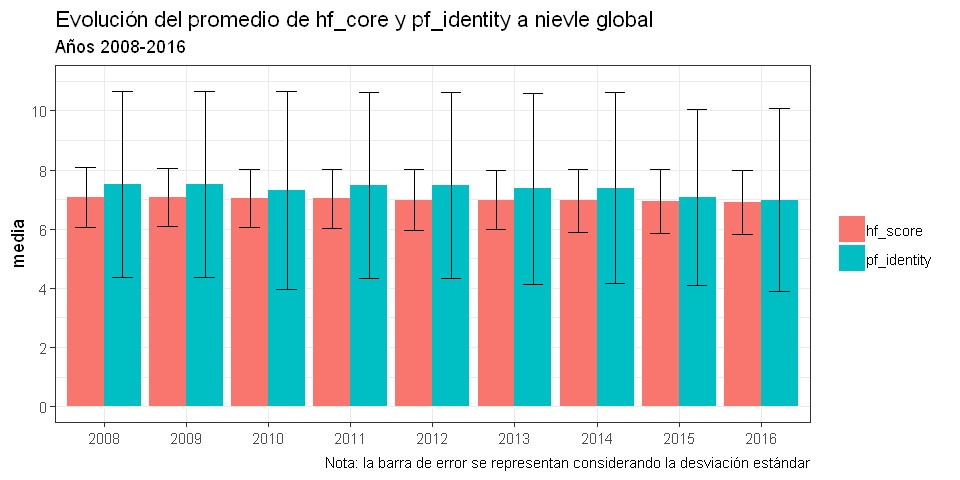

In [10]:
options(repr.plot.width=8, repr.plot.height=4)

df.all <- df %>% 
  select(names(df[, c("year", vars)])) %>%
  gather(key = variable, value = value, -year)  %>% 
  mutate(year = as.factor(year)) %>% 
  group_by(year, variable) %>% 
  summarise_all(med.descrip, na.rm = TRUE) 

ggplot(df.all, aes(x = year, y = media, fill = variable)) + 
    geom_bar(position = position_dodge(), stat="identity") +
    geom_errorbar(aes(ymin = media-ds, ymax = media+ds), width = 0.5, position = position_dodge(0.9)) +
    scale_y_continuous(limits = c(0, 11), breaks = seq(0, 11, 2)) +
    theme_bw() + theme(
                  legend.title = element_blank()) +
    labs(title = "Evolución del promedio de hf_score y pf_identity a nivel global", subtitle = "Años 2008-2016", 
         caption = "Nota: la barra de error se representan considerando la desviación estándar", x = NULL)

Al analizar reginalmente el comportamiento de los indicadores, se observan tanto diferenicas en las medias como algunas variaciones a lo largo de los años.

La media tando del *hf_score* como el *pf_identity* de los países de las regiones de Middle East & North Africa, Sub-Saharan Africa y South Asia son inferiores al del resto de las regiones. Pero más allá de esto, se caracterizan *pf_identity* medios inferiores a los *hf_score*, contrastando claramente con el resto de las regiones. Lo mismo sucede puede decirse en cuanto a la mayor dispersión en general de esos indicadores en las regiones señaladas.

En LAC, en tanto, se observa que el *hf_score* no tiene variaciones a lo largo de lo años, pero en cuanto a la media del *pf_identity* se aprecia una caída de un punto a parti de 2015, pasando de una media de 9 a 8 puntos aproximadamente. 

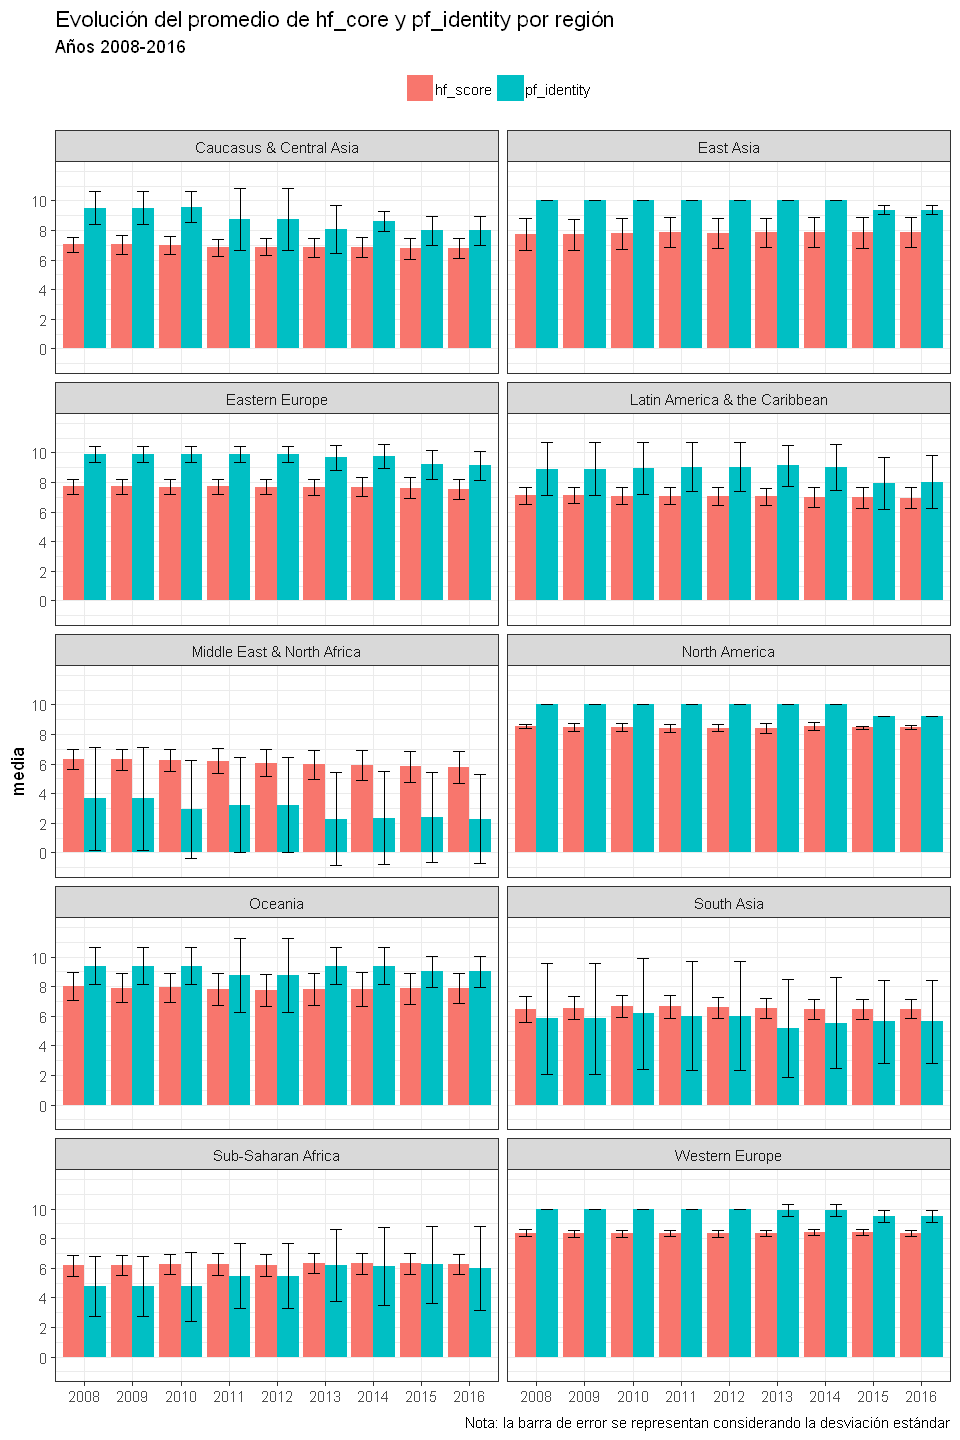

In [173]:
options(repr.plot.width=8, repr.plot.height=12)

df.all <- df %>% 
  select(names(df[, c("year", "region", vars)])) %>%
  gather(key = variable, value = value, -year, -region)  %>% 
  mutate(year = as.factor(year)) %>% 
  group_by(year, region, variable) %>% 
  summarise_all(med.descrip, na.rm = TRUE) 

ggplot(df.all, aes(x = year, y = media, fill = variable)) + 
    geom_bar(position = position_dodge(), stat="identity") +
    geom_errorbar(aes(ymin = media-ds, ymax = media+ds), width = 0.5, position = position_dodge(0.9)) +
    scale_y_continuous(limits = c(-1, 12), breaks = seq(0, 11, 2)) +
    theme_bw() + theme(legend.position="top",
                  legend.title = element_blank()) +
    facet_wrap(region ~ ., nrow=5) +
    labs(title = "Evolución del promedio de hf_score y pf_identity por región", subtitle = "Años 2008-2016", 
         caption = "Nota: la barra de error se representan considerando la desviación estándar", x = NULL)

Al analizar la evolución por país en LAC, vemos que el indicador *pf_identity* tiene un comportamiento bastante oscilante a lo largo del período 2008-2016, aunque Argentina se destaca de manera constante con un índice de 10. En cuanto a la variable de libertades humanas (*hf_score*), el comportamiento de los paises de la región es relativamente más estable, destacándose Chile y Costa Rica con los score más altos (aproximadamente 8), mientras que Argentina, en 2016 por ejemplo, tuvo un score de 6.47, inferior al promedio de la región (6.95). En tanto, la serie de Venezuela se desprende del resto de la región, reflejando una caída hasta alcanzar 4.20 en el año 2016. *(Nota: la identificación se realizó a través de la versión dinámica del gráfico de lineas siguiente empleando el paquete plotly, aunque no funciona en github puede correrse descragando el archivo *ipynb).*

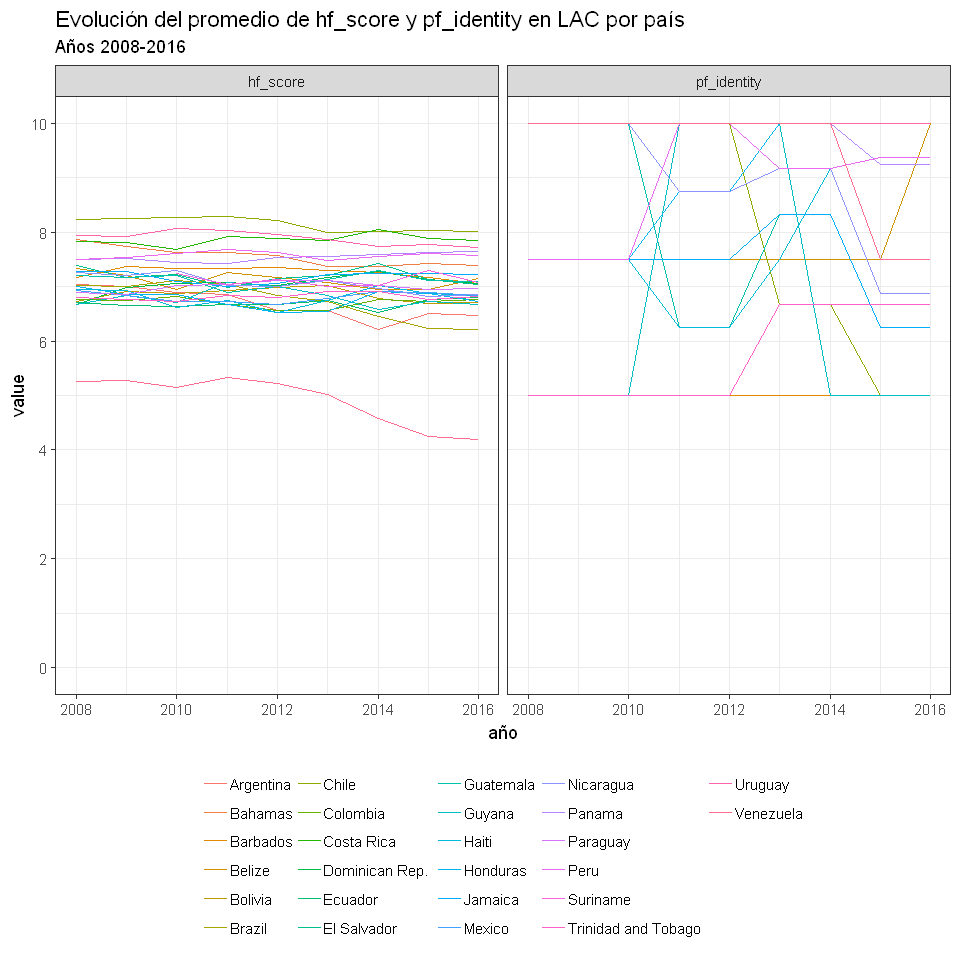

In [68]:
options(repr.plot.width=8, repr.plot.height=8)

df.latam <- df %>% filter(region == "Latin America & the Caribbean") %>% 
  select(names(df[, c("year", "ISO_code", "countries", vars)])) %>%
  gather(key = variable, value = value, -year, -ISO_code, -countries) %>% 
  filter(!is.na(value))

paises.latam <- ggplot(df.latam, aes(x=year, y=value, colour=countries)) +
    geom_line() +
    facet_grid(. ~ variable) +
    scale_y_continuous(limits = c(0, 10), breaks = seq(0, 10, 2)) +
    theme_bw() + theme(legend.position="bottom",
                  legend.title = element_blank()) +
    labs(title = "Evolución del promedio de hf_score y pf_identity en LAC por país", subtitle = "Años 2008-2016", x="año")

#ggplotly(paises.latam)
paises.latam

Para finalizar, se presenta una comparación del índice de libertad económica (*ef_score*) y humana (*hf_score*). Como se aprecia en el siguiente gráfico, en general *hf_score* medio es superior al *ef_score*, aunque la brecha ha ido disminuyendo a lo largo de los años, pero más bien por una tendencia decreciente en el score de libertad humana que por un incremento en el *ef_score*.

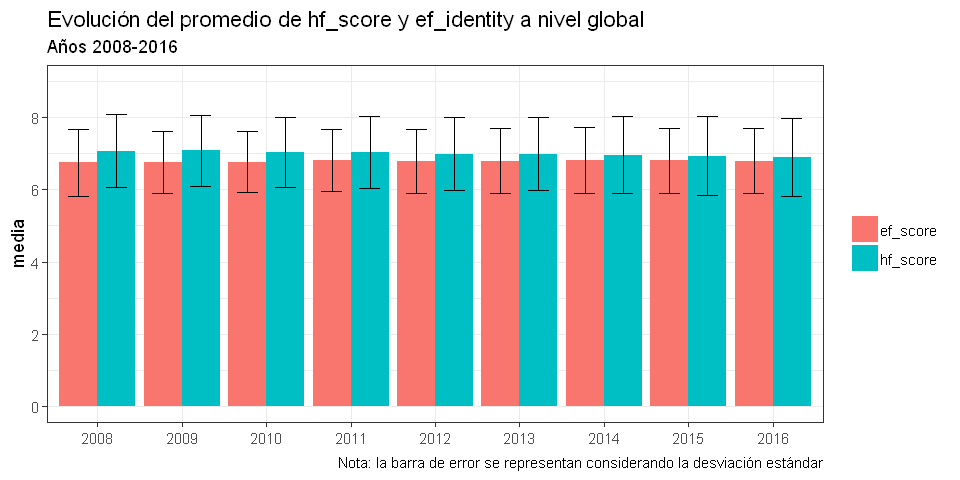

In [62]:
options(repr.plot.width=8, repr.plot.height=4)

df.all <- df %>% 
  select(names(df[, c("year", "hf_score", "ef_score")])) %>%
  gather(key = variable, value = value, -year)  %>% 
  mutate(year = as.factor(year)) %>% 
  group_by(year, variable) %>% 
  summarise_all(med.descrip, na.rm = TRUE) 

ggplot(df.all, aes(x = year, y = media, fill = variable)) + 
    geom_bar(position = position_dodge(), stat="identity") +
    geom_errorbar(aes(ymin = media-ds, ymax = media+ds), width = 0.5, position = position_dodge(0.9)) +
    scale_y_continuous(limits = c(0, 9), breaks = seq(0, 9, 2)) +
    theme_bw() + theme(
                  legend.title = element_blank()) +
    labs(title = "Evolución del promedio de hf_score y ef_identity a nivel global", subtitle = "Años 2008-2016", 
         caption = "Nota: la barra de error se representan considerando la desviación estándar", x = NULL)

# 4. Carcaterización de las distribuciones de los índices de identidad y de libertad humana

Como se comenzó a vislumbrar al analizar los boxplots en la sección 2 la variable *pf_identity* tiene una distribución relativamente asimetrica derecha, mientras que los *hf_score* tienen una distribución bastante simétrica, e incluso, como puede observarse ahora a través de los histogramas, tendientes a una forma acampanada que nos lleva a pensar en una posible distribución normal de este indicador, tanto en LAC como a nivel global. A continuación se buscará contrastar esta hipótesis (entorno a la variabe *hf_score*) para el conjunto de países a nivel global (considerando el año 2016), tanto de menra gráfica como algunos estadísticos de prueba apropiados.

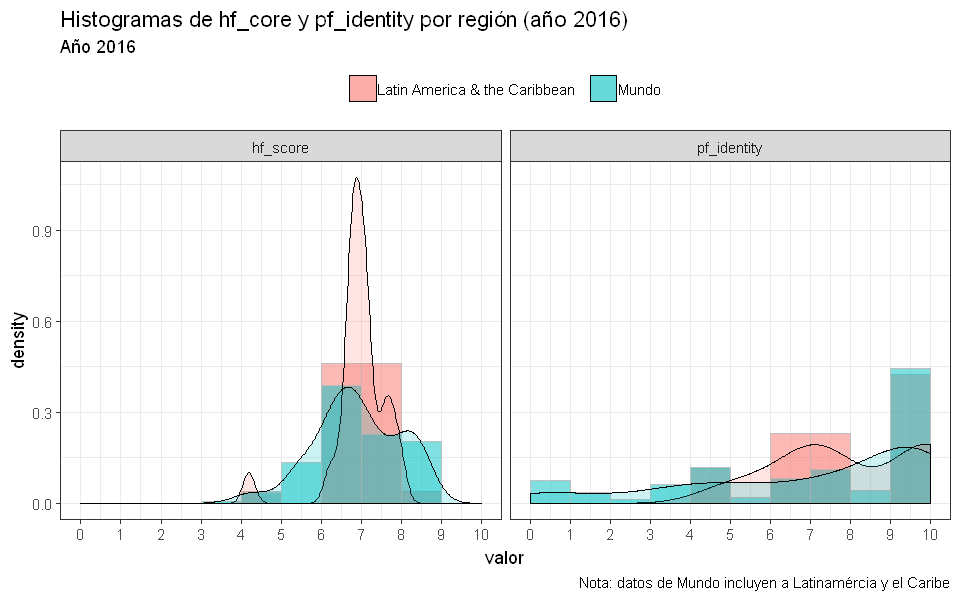

In [13]:
options(repr.plot.width=8, repr.plot.height=5)

df.all <- df %>% filter(year %in% ano) %>% 
  select(names(df[, c("region", vars)])) %>%
  gather(key = variable, value = value, -region) %>% 
  mutate(region = "Mundo")

df.latam <- df %>% filter(year %in% ano, region == "Latin America & the Caribbean") %>% 
  select(names(df[, c("region", vars)])) %>%
  gather(key = variable, value = value, -region)

histo <- ggplot(rbind(df.all, df.latam), aes(x = value, y=stat(density), fill = region)) + 
    geom_histogram(breaks=seq(0,10,1), alpha = .5, colour="gray", position = "identity") +
    geom_density(alpha = .2) +
    theme_bw() + theme(legend.position="top",
                  legend.title = element_blank()) +
    facet_grid(. ~ variable) +
    scale_x_continuous(limits = c(0, 10), breaks = seq(0, 10, 1)) +
    labs(title = "Histogramas de hf_score y pf_identity por región", subtitle = "Año 2016", 
         caption = "Nota: datos de Mundo incluyen a Latinamércia y el Caribe", x = "valor")

#ggplotly(histo)
histo

Al analizar el Q-Q plot para contrastar los valores observados de la variable *hf_score* contra los valores teóricos de una normal con parámetros media=6.9 y ds=1.08 (estimados a partir de los datos de la distribución) podemos ver que la distribución no se ajusta perfectamente a una distribución normal, particularmente los puntos de los extrmos se alejan de la recta de 45 grados que representarían un ajuste perfecto a una normal con los parámetros definidos (i.e. en consonancia con el histograma, se refleja una cola *pesada*, con una leve asimetría izquierda). 

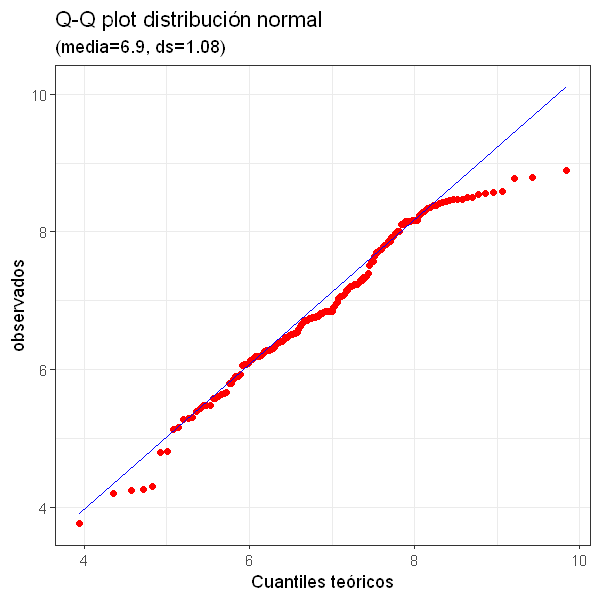

In [41]:
options(repr.plot.width=5, repr.plot.height=5)

# Estimación de los parámetros de la distribución (media y desviación estándar)
params <- as.list(MASS::fitdistr(df.all[df.all$variable == "hf_score", "value"], "normal")$estimate)  # estima desv standar con EMV (sesgado)

qqplot.all <- ggplot(df.all[df.all$variable == "hf_score", ], aes(sample = value)) +
  stat_qq(distribution = qnorm, dparams = c(params$mean, params$sd), color = "red") +
  stat_qq_line(distribution = qnorm, dparams =  c(params$mean, params$sd), color = "blue") +
  theme_bw() +
  labs(title = "Q-Q plot distribución normal", subtitle = "(media=6.9, ds=1.08)", 
        x = "Cuantiles teóricos", y="observados")

#ggplotly(qqplot.all)
qqplot.all

En relación a lo que se señaló previamente, vemos que el coeficiente de asimetría negativo (-0.29) refleja la asimetría izquierda, mientras que el coeficiente de curtosis mayor a cero (2.78) indica que la distribución es leptocúrtica (o puntiaguda), con una mayor concentración relativa de los datos entorno a la media (algo que se mencionó al interpretar los coeficientes de variación anteriormente). *(Nota: una distribución gaussiana o normal se caracteriza por un coeficiente de curtosis igual a cero)*

In [39]:
data.frame(coef.asim=skewness(df.all[df.all$variable == "hf_score", "value"]),
    coef.kurt=kurtosis(df.all[df.all$variable == "hf_score", "value"]))

coef.asim,coef.kurt
-0.2933357,2.78069


En relación a pruebas formales para contrastar normalidad, donde la hipótesis nula es que la variable *hf_score* se distribuye normal con parámetros media=6.9 y ds=1.08 (estimados a partir de los datos), se presentan dos alternativas: Kolmogorov-Smirnov y Sapiro Wilks. En el primer caso, atendiendo al *p-valor = 0.5766* no se rechaza la hipótesos nula, por lo que en base a este test podríamos considerar que la variable en cuestión tiene distribución normal con los parámetros citados (contrastando con la conclusión señalada anteriormente al analizar al Q-Q plot).

Por su parte, mediante el test de Shapiro Wilks, considerado más portente para testear la normalidad de la distribución, se obtiene un *p-valor = 0.0061* que conduce a rechazar la hipótesis nula de normalidad para cualquier nivel de significación habitual (por ej. $\alpha=0.01$).

In [42]:
ks.test(df.all[df.all$variable == "hf_score", "value"], "pnorm", params$mean, params$sd) 
shapiro.test(df.all[df.all$variable == "hf_score", "value"])


	One-sample Kolmogorov-Smirnov test

data:  df.all[df.all$variable == "hf_score", "value"]
D = 0.061303, p-value = 0.5766
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  df.all[df.all$variable == "hf_score", "value"]
W = 0.97584, p-value = 0.006157


# 5. Relación entre las libertades sociales y económicas 

A Continuación de busca analizar el comportamiento conjunto de las variables de libertad económica (*ef_score*), la libertad humana (*hf_score*) y uno de los subindicadores de liberad personal, Identity and relationships (*pf_identity*), que venimos anlizando en las secciones previas. cabe aclarar que solo nos limitamos a analizar la correlación entre estas variables, y nos estamos estableciendo caudalidades.

Vemos así en la figura que existe una correlación positiva entre *hf_score* y *ef_score*, incluso con un coeficiente de correlación (de Pearson) relativamente elevado: 0.84, marcando la fuerte intensidad de la relación entre estas variables.
En tanto, *hf_score* y *pf_identity* tiene una rlación un poco más débil que la anterior, pero aun positiva: es decir, países con mayores libertades humanas se caracterizan por mayores índices de libertad personal vinculada a la identidad. En tanto, la relación más debil se da entre las libertades económicas y este último indicador (coef. de Person=0.36). Cabe aclarar que los coeficientes calculados describen una correlación **lineal** entre las variables, al tiempo que podría realizarse un test de hipótesis para contrastar si efectivamente los coeficientes son distintos de cero. Por otra parte, debe atenderse que *pf_identity* es un promedio de otros subindicadores vinculados que asume valores discretos entre 0 y 10, pero al ser un promedio de esos valores puede asumirse como continua, tal como se aprecian en el gráfico de dispersión respectivo (más allá de que las combinaciones posibles de puntajes discretos de los subindicadores, la cantidad de valores que podrá asumir es finita numerable).

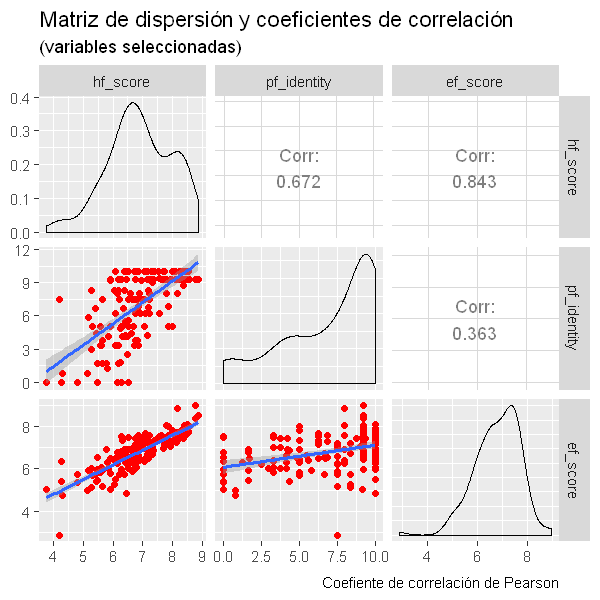

In [44]:
options(repr.plot.width=5, repr.plot.height=5)
df.disp <- df %>% filter(year %in% ano) %>% 
  select("hf_score", "pf_identity","ef_score") 
  
#main = "Matriz de dispersión y coeficientes de correlación \n de variables seleccionadas")
#install.packages("GGally")
library(GGally)
my_fn <- function(data, mapping, method="lm", ...){
      p <- ggplot(data = data, mapping = mapping) + 
      geom_point(color="red") + 
      geom_smooth(method=method, ...)
      p
    }
ggpairs(df.disp, lower = list(continuous = my_fn)) +
    labs(title = "Matriz de dispersión y coeficientes de correlación", subtitle = "(variables seleccionadas)",
        caption = "Coefiente de correlación de Pearson")